**1. Problem constant growth**:

1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.

3.  Can you determine when non-zero steady states are achieved? Explain.

**1. Answer:**

1.1: I plotted 4 different sets of initial populations on the subplots below. In all cases, a non-changing steady state  population is quickly achieved (this makes sense, we have no feedback). The final relative concentrations of the daisies depend on initial concentrations - if a daisy type is dominant initially (say, .7 relative coverage), its final concentration will be higher than if it's sparse initially (say, .2 relative coverage) (Figs 1 and 4 illustrate this.) Fig 2 illustrates that if both types are similarly sparse initially (both .01 relative coverage), they'll grow to the same steady state. Interestingly Fig 3 illustrates that if both populations take up half the total area each, they'll decrease to the same steady state as in Fig 2. (This shows that final coverage relies both on growth rate and on free space available). 

1.2: I did this for 4 different sets of growth rates (& the initial concentrations specified). With a growth rate of 1, both daisies reach a steady state. With a growth rate equal to the death rate, both sets of daisies seem to be approaching a different, non-zero steady state. When a daisy's growth rate is less than the death rate, it eventually dies out. 

1.3 For a non-zero steady state to exist, the change in a daisy's population has to be non-negative. In the following equations:

$$
\frac{dA_w}{dt} = A_w ( \beta_w x - \chi) 
$$


$$
\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)
$$

The quantities 
$$
( \beta_b x - \chi)  \:\:\:and\:\:\:   ( \beta_w x - \chi) 
$$

have to be nonnegative. With a fixed chi, this then depends on both the growth rate and the space available. In this case, the growth rate is fixed but the space available keeps changing.

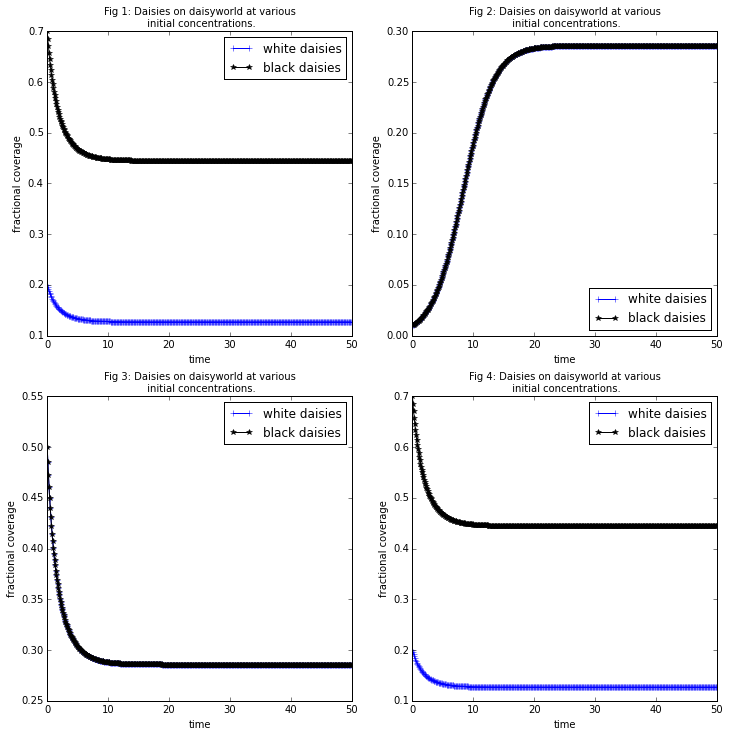

In [10]:
# integrate constant growth rates with fixed timesteps
#
%matplotlib inline
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class Integ51(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
#         #print("whiteconc")
#         white = (self.initvars.whiteconc)
#         #print("blackconc")
#         black = print(self.initvars.blackconc)
        self.nvars = len(self.yinit)
        return None
    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.7  # growth rate for black daisies
        beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
 
        return f

theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

file_list = ['fixed_growth.yaml','fixed_growth2.yaml','fixed_growth3.yaml','fixed_growth4.yaml']
str_list  = ['Fig 1','Fig 2','Fig 3','Fig 4']


#print(file_list[0])


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,5):
        
    ax = fig.add_subplot(2,2,i)
    theSolver = Integ51(file_list[i-1])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    
    theLines = ax.plot(timeVals, yVals)  
    theLines[0].set_marker('+')
    theLines[0].set_linestyle('-')
    theLines[1].set_color('k')
    theLines[1].set_marker('*')

    ax.legend(theLines, ('white daisies', 'black daisies'), loc='best')
    #ax.plot(timeVals[1], yVals[1])
    titl =  str_list[i-1]  + ": Daisies on daisyworld at various \n initial concentrations. " 
    ax.hold(True)
    ax.set_title(titl, fontsize = 10)
    ax.set_xlabel("time")
    ax.set_ylabel("fractional coverage")
    
fig.set_facecolor('w')
plt.show()

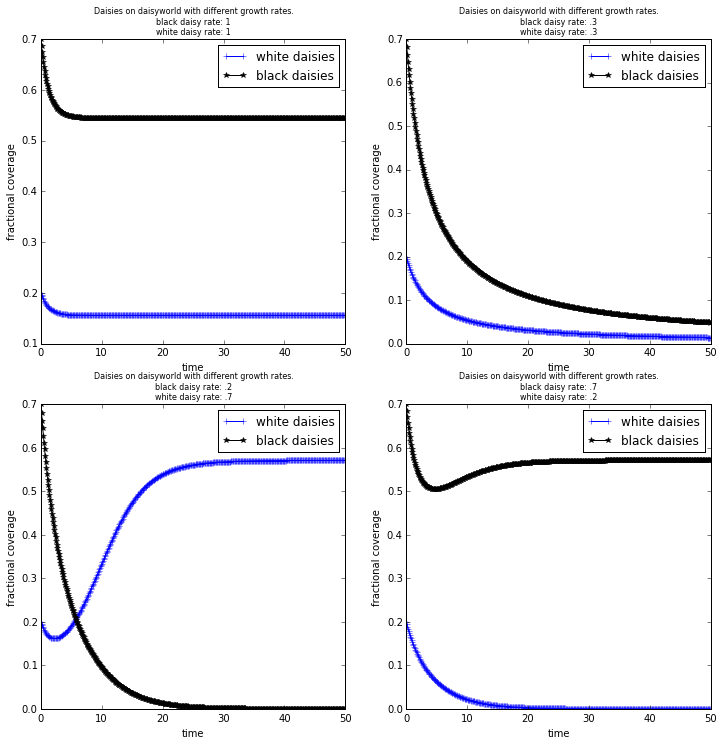

In [20]:
#
# integrate constant growth rates with fixed timesteps
#
%matplotlib inline
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class Integ51(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None
    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
#         beta_b = 0.7  # growth rate for black daisies
#         beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (user.beta_w * x - user.chi)
        f[1] = y[1] * (user.beta_b * x - user.chi)
        return f
    

file_list = ['fixed_growth5.yaml','fixed_growth6.yaml','fixed_growth7.yaml','fixed_growth8.yaml']
str_list  = ['\nblack daisy rate: 1 \nwhite daisy rate: 1','\nblack daisy rate: .3 \nwhite daisy rate: .3','\nblack daisy rate: .2 \nwhite daisy rate: .7','\nblack daisy rate: .7\nwhite daisy rate: .2']
fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,5):
        
    ax = fig.add_subplot(2,2,i)
  

    theSolver = Integ51(file_list[i-1])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()

    theLines = ax.plot(timeVals, yVals)  
    theLines[0].set_marker('+')
    theLines[0].set_linestyle('-')
    theLines[1].set_color('k')
    theLines[1].set_marker('*')
    
    
    ax.legend(theLines, ('white daisies', 'black daisies'), loc='best')
    ax.set_xlabel("time")
    ax.set_ylabel("fractional coverage")
    titl = titl =  "Daisies on daisyworld with different growth rates. " + str_list[i-1]   

    
    ax.hold(True)
    ax.set_title(titl, fontsize = 8)

fig.set_facecolor('w')
plt.show()


**2. Problem Coupling**  Consider daisies with the same albedo as the
planet, i.e. ’grey’ or neutral daisies, as specified in derivs5 routine
below.  

1.  For the current value of L (0.2) in the file coupling.yaml, 
    the final daisy steady state is zero.
    Why is it zero?

2.  Find a value of L which leads to a non-zero steady state.

3.  What happens to the emission temperature as L is varied?  (Make a plot of
    $L$ vs. $T_E$ for 10-15 values of $L$)

After reading the the next section on the local
temperature,

4.  Do you see any difference between the daisy temperature and emission
    temperature? Plot both and explain.

5.  How (i.e. thorugh what mechanism) does the makeup of the  global daisy population 
    affect the local temperature?
    
** 2. Answer **

1. The L is insufficient to maintain a non-zero growth rate; this is to say, at this L, the proportion of solar flux reaching Daisyworld is insufficient to produce a local temperature  that leads to a non-zero growth rate. However, there is still a positive death rate, so all the flowers die. 

2. For example, an L of .5 works, among many others - see plot below. 

3. See 

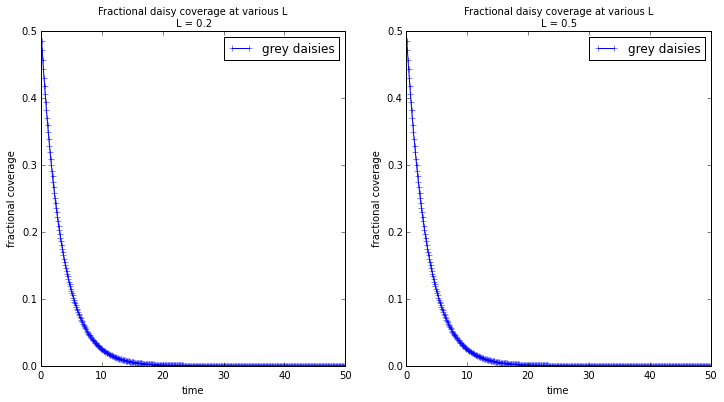

In [18]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f
    
file_list = ['coupling.yaml','coupling2.yaml','coupling3.yaml','coupling4.yaml']
str_list = ['L = 0.2','L = 0.5']

fig, big_axes = plt.subplots( figsize=(12.0, 6.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,3):
        
    ax = fig.add_subplot(1,2,i)
  

    theSolver = IntegCoupling(file_list[i-1])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()

    theLines = ax.plot(timeVals, yVals)  
    theLines[0].set_marker('+')
    theLines[0].set_linestyle('-')
#     theLines[1].set_color('k')
#     theLines[1].set_marker('*')
    
    
    ax.legend(theLines, ('grey daisies', 'black daisies'), loc='best')
    titl = "Fractional daisy coverage at various L \n" + str_list[i-1]

    
    ax.hold(True)
    ax.set_title(titl, fontsize = 10)
    ax.set_xlabel("time")
    ax.set_ylabel("fractional coverage")

fig.set_facecolor('w')
plt.show()

In [19]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f

[   0.          172.69797355  205.3736589   227.28331509  244.2318164
  258.24370427  270.28693542  280.90647604  290.44221377  299.12166456
  307.10525053]


/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


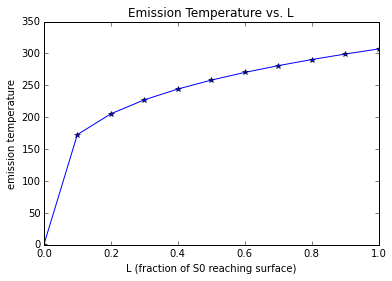

In [13]:
albedo_ground = .3
albedo_grey = .6
frac_daisies = .5
S0 = 3668.0

L_array = np.linspace(0,1,11)
Te_array = np.zeros(11)

for i in range(0,11):
   
    sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
    albedo_p = (1-frac_daisies) * albedo_ground + frac_daisies * albedo_grey
    Te_4 = (S0 / 4.0) * L_array[i] * ((1.0 - albedo_p) / sigma)
    Te_array[i] = np.sqrt(np.sqrt(Te_4))
    
thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(L_array, Te_array)
line1.set_marker('*')
theAx.set_title('Emission Temperature vs. L')
theAx.set_xlabel('L (fraction of S0 reaching surface)')
theAx.set_ylabel('emission temperature')
out=theAx.legend(loc='center right')

print(Te_array)
    
# sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4

# x = 1.0 - y[0]


# eta = user.R * user.S0 / (4.0 * sigma)
# temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25

**4. Problem initial** The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the 
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.

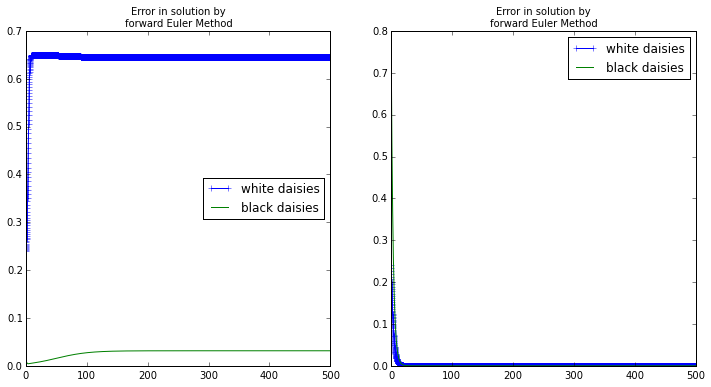

In [53]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ54(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fraction
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f


file_list = ['initial2.yaml','initial3.yaml']

fig, big_axes = plt.subplots( figsize=(12.0, 6.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,3):
        
    ax = fig.add_subplot(1,2,i)
  

    theSolver = Integ54(file_list[i-1])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()

    theLines = ax.plot(timeVals, yVals)  
    theLines[0].set_marker('+')
    theLines[0].set_linestyle('-')
#     theLines[1].set_color('k')
#     theLines[1].set_marker('*')
    
    
    ax.legend(theLines, ('white daisies', 'black daisies'), loc='best')
    titl = "Error in solution by \nforward Euler Method"

    
    ax.hold(True)
    ax.set_title(titl, fontsize = 10)

fig.set_facecolor('w')
plt.show()

<a name="prob_temperature"></a>
**5. Problem Temperature**:  The code above adds a new method, ```find_temp``` that takes the white/black daisy fractions and calculates local and planetary temperatures.

1. override ```timeloop5fixed``` so that it saves these three temperatures, plus the daisy growth rates
   to new variables in the Integ54 instance
   
2. Make plots of (temp_w, temp_b) and (beta_w, beta_b) vs. time for a case with non-zero equilibrium
   concentrations of both black and white daisies

<a name="prob_estimate"></a>

**6. Problem Estimate**: In the demo below, compare the error estimate to
the true error, on the initial value problem from ,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$ 

which has the exact
solution 

$$y(t) = t + e^{-t}$$

1.  Play with the time step and final time, attempting small changes at
    first. How reasonable is the error estimate?

2.  Keep decreasing the time step. Does the error estimate diverge from
    the computed error? Why?

3.  Keep increasing the time step. Does the error estimate diverge? What
    is happening with the numerical solution?

In [55]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ55(Integrator):

    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user=self.uservars
        f=np.empty_like(self.yinit)
        f[0]=user.c1*y[0] + user.c2*theTime + user.c3;
        return f


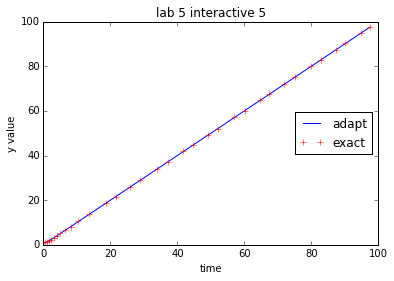

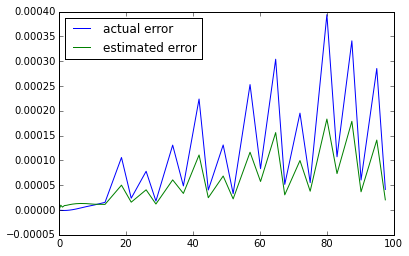

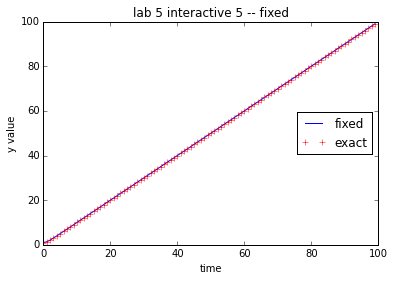

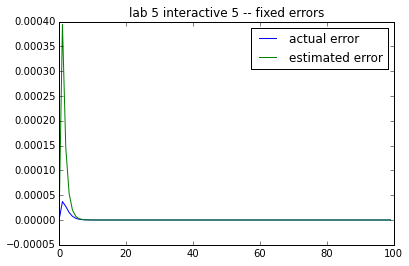

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theSolver=Integ55('expon4.yaml')

timeVals,yVals,yErrors =theSolver.timeloop5Err()
timeVals=np.array(timeVals)
exact=timeVals + np.exp(-timeVals)
yVals=np.array(yVals)
yVals=yVals.squeeze()
yErrors=np.array(yErrors)

thefig,theAx=plt.subplots(1,1)
line1=theAx.plot(timeVals,yVals,label='adapt')
line2=theAx.plot(timeVals,exact,'r+',label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig,theAx=plt.subplots(1,1)
realestError = yVals - exact
actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
theAx.legend(loc='best')


timeVals,yVals,yErrors =theSolver.timeloop5fixed()

np_yVals=np.array(yVals).squeeze()
yErrors=np.array(yErrors)
np_exact=timeVals + np.exp(-timeVals)


thefig,theAx=plt.subplots(1,1)
line1=theAx.plot(timeVals,np_yVals,label='fixed')
line2=theAx.plot(timeVals,np_exact,'r+',label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig,theAx=plt.subplots(1,1)
realestError = np_yVals - np_exact
actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')